In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df=pd.read_csv("/content/sample_data/Housing.csv")

In [3]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
df.shape

(545, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


CHECKING FOR NULL VALUES


In [7]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


Encode Categorical Variables (One-hot Encoding)


In [16]:
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'prefarea', 'furnishingstatus']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


Correlation Matrix

In [17]:
correlation_matrix = df_encoded.corr()

# ✅ Check final shape after encoding




In [18]:
print("\nShape after one-hot encoding:", df_encoded.shape)


Shape after one-hot encoding: (545, 14)


Ploting Correlation Heatmap

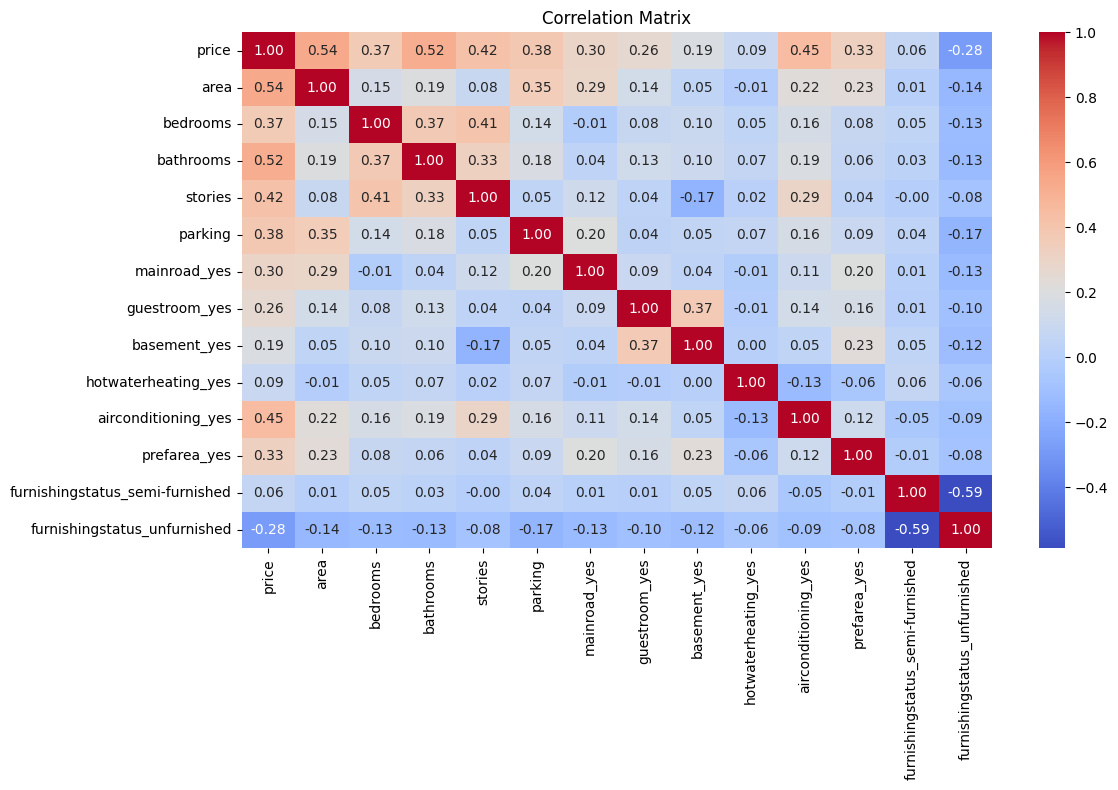

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# 🔥 Top correlations with price





In [20]:
correlations_with_price = correlation_matrix["price"].sort_values(ascending=False)
print("\nTop correlations with price:")
print(correlations_with_price.head(10))



Top correlations with price:
price                  1.000000
area                   0.535997
bathrooms              0.517545
airconditioning_yes    0.452954
stories                0.420712
parking                0.384394
bedrooms               0.366494
prefarea_yes           0.329777
mainroad_yes           0.296898
guestroom_yes          0.255517
Name: price, dtype: float64


# 📈 Heatmap of correlations


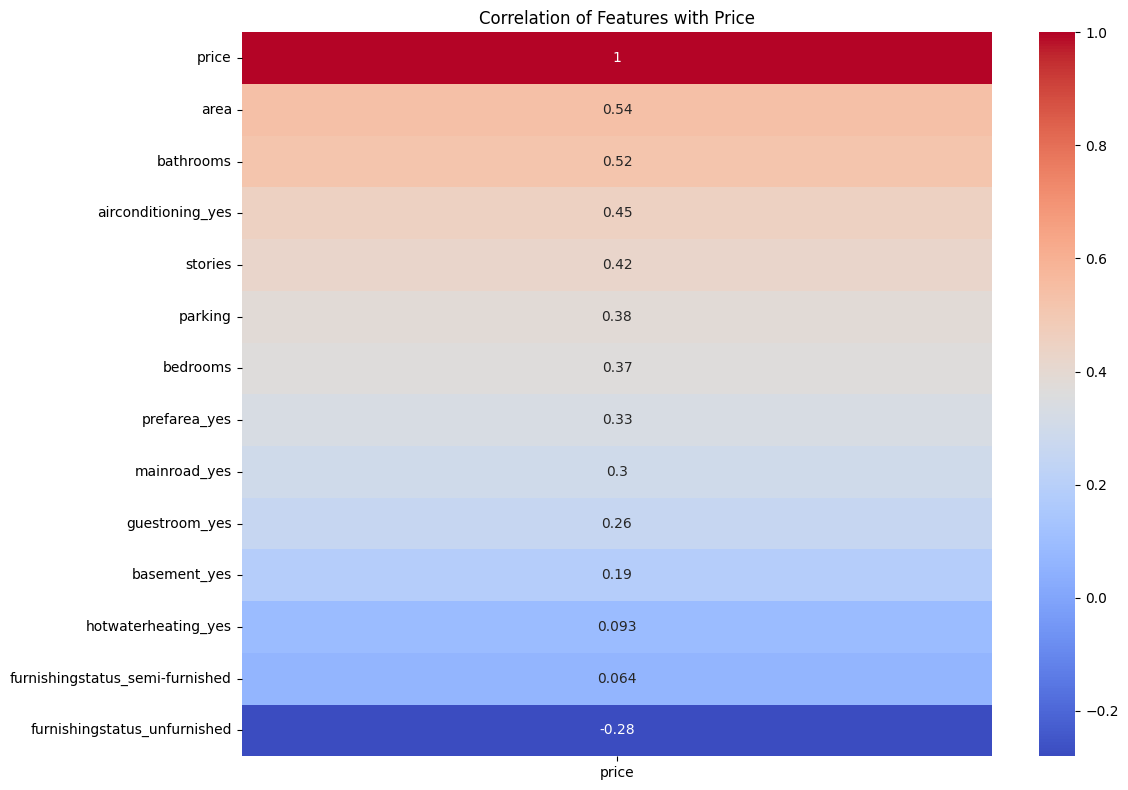

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['price']].sort_values(by='price', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with Price")
plt.tight_layout()
plt.show()

# 📊 Scatter plots for numeric features


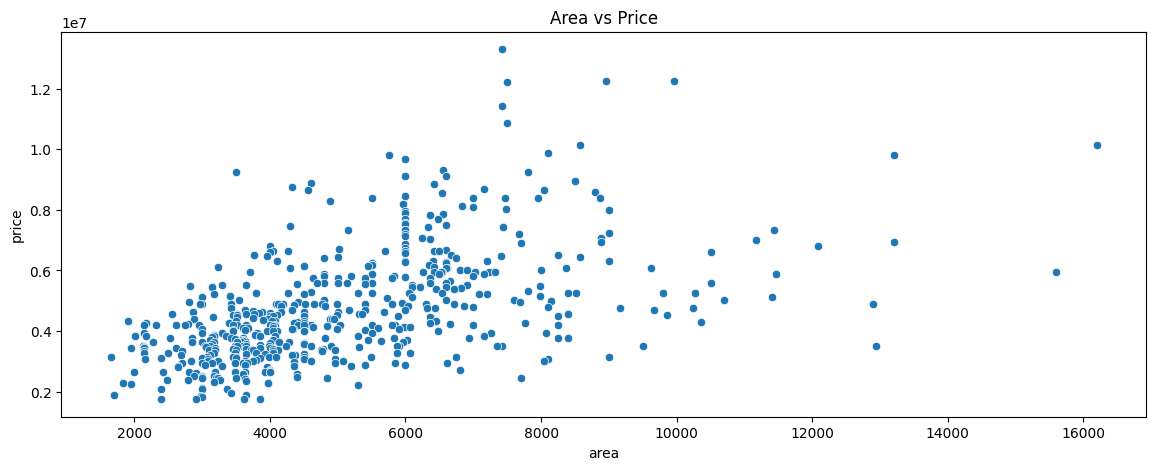

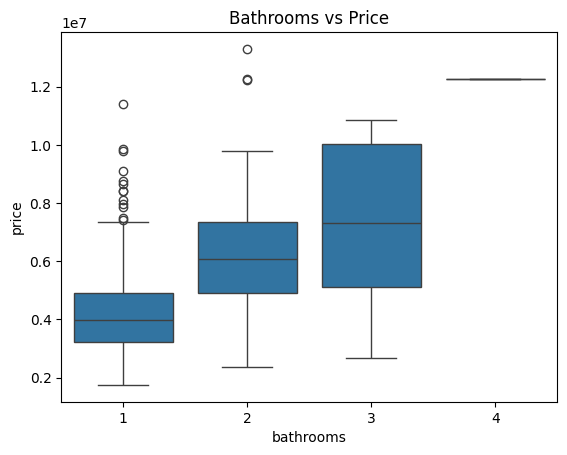

In [23]:
plt.figure(figsize=(14, 5))
sns.scatterplot(data=df, x='area', y='price')
plt.title("Area vs Price")
plt.show()


sns.boxplot(data=df, x='bathrooms', y='price')
plt.title("Bathrooms vs Price")
plt.show()

# 📦 Boxplot for Furnishing Status


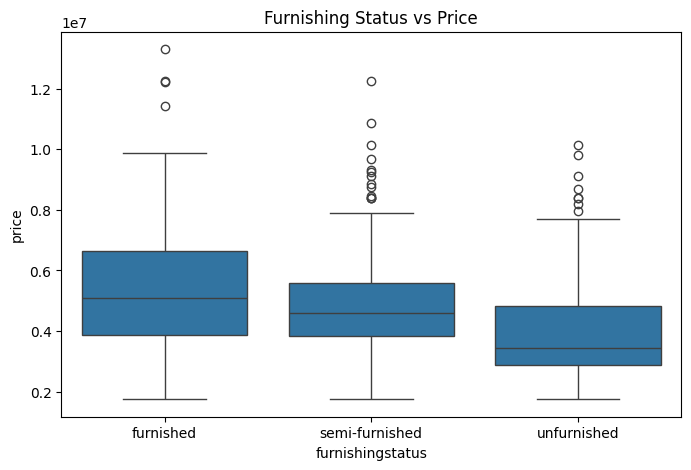

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='furnishingstatus', y='price')
plt.title("Furnishing Status vs Price")
plt.show()

# 📊 Bar Chart for Air Conditioning


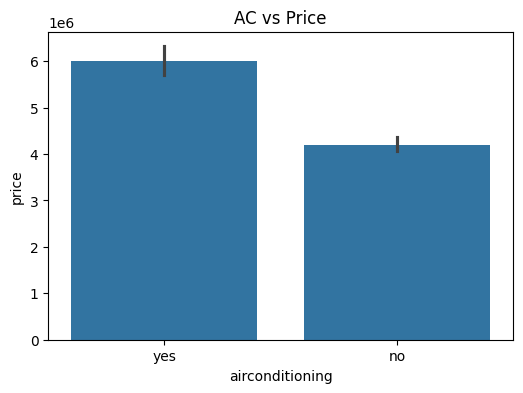

In [25]:

plt.figure(figsize=(6, 4))
sns.barplot(x='airconditioning', y='price', data=df)
plt.title("AC vs Price")
plt.show()

# 📊 Interactive Scatter (Plotly)


In [26]:
fig = px.scatter(df, x="area", y="price", color="furnishingstatus",
                 size="bedrooms", hover_data=["bathrooms"])
fig.update_layout(title="Interactive Scatter Plot: Area vs Price")
fig.show()

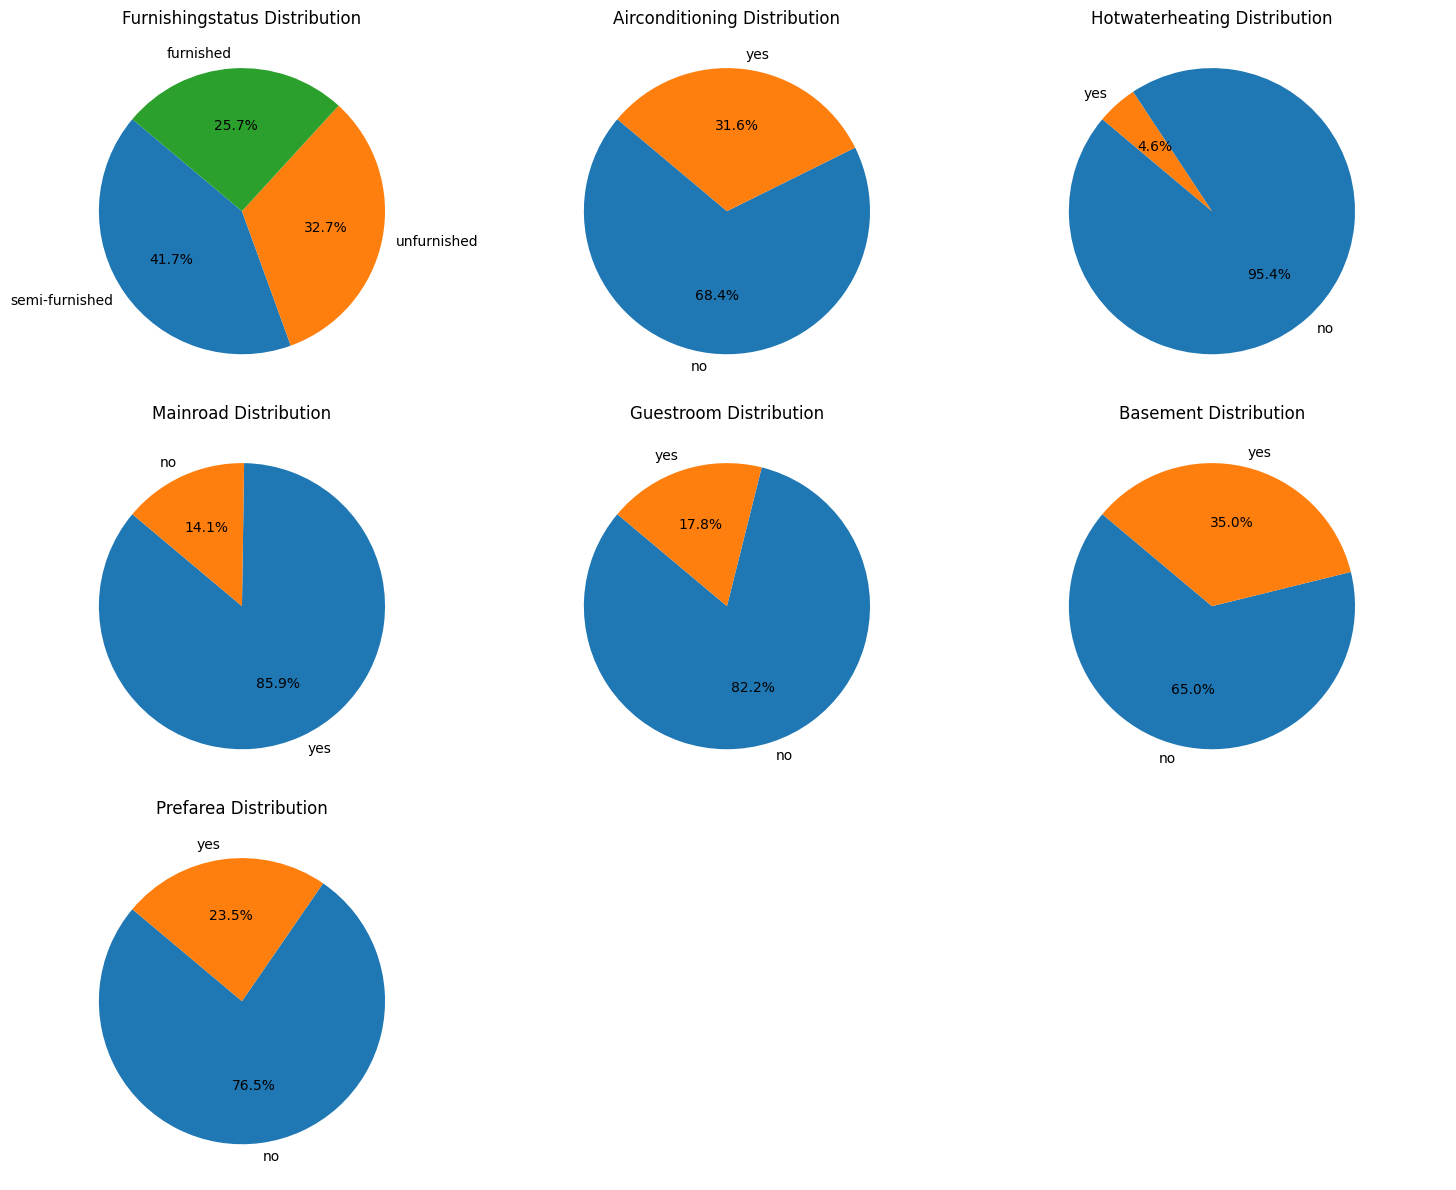

In [27]:
import matplotlib.pyplot as plt

# Categorical columns to visualize
cat_cols = ['furnishingstatus', 'airconditioning', 'hotwaterheating',
            'mainroad', 'guestroom', 'basement', 'prefarea']

# Prepare the layout
n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols  # dynamic rows based on number of charts

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()  # Flatten in case it's 2D

# Generate pie charts
for i, col in enumerate(cat_cols):
    counts = df[col].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'{col.capitalize()} Distribution')

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Based on the analysis, properties with air conditioning and hot water heating are associated with higher prices. Real estate agents can use this insight to highlight these amenities when marketing listings or advising sellers on profitable upgrades


Real Estate Strategy Implication
Real estate professionals can leverage these findings to:

Price properties more effectively based on size and amenities

Advise sellers on high-impact upgrades (like adding AC or furnishing)

Market listings by emphasizing value-driving features

Educate buyers on what drives pricing differences across homes

